In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 2
#order = ['Memory B cell',  'CD8 effector','NK','Naive B cell','Naive CD8','CD8 central memory','Plasma','Mono', 'CD8 effector memory', 'Tregs','Naive CD4',
        #'CD4 effector memory','CD4 central memory']
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/melanoma_EMseq_thirdbatch/combined_result/deconresult_gt/fresh/method1Fract_BL22CD8TILranked100_merged_mel_inflectionSM.txt_result_posscore.txt_CSxOut.txt_yale3rdbatch_gt.txt_ctrename.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

order=['iDC', 'Mono', 'mDC', 'NK', 'PMN', 'Megakaryocyte', 'Eosinophil', 'Erythrocyte', 'Mac (M1)', 'CD8TIL', 'Mac (M0)', 'Naive B', 'CD8 TEMRA', 'CD8 TCM', 'Mac (M2)', 'Memory B', 'Tregs', 'CD8 TEM', 'MelTumor', 'CD4 TEM', 'Naive CD4 T',  'Naive CD8','CD4 TCM']

#order=['NK', 'Bcell', 'Mono', 'CD4', 'CD8']
'''
order=df.columns.tolist()
order.remove('Toxicity')
order.remove('Total')
order.remove('Response')
order.remove('Batch')
order.remove('Sequencing Technology')
'''


"\norder=df.columns.tolist()\norder.remove('Toxicity')\norder.remove('Total')\norder.remove('Response')\norder.remove('Batch')\norder.remove('Sequencing Technology')\n"

In [3]:
df = df[df['Toxicity'].notna()]

In [4]:
conditions = [(df['Toxicity'] <= cutoff), (df['Toxicity'] > cutoff)]
values = ['toxicity <= ' + str(cutoff), 'toxicity > ' + str(cutoff)]
df['Toxic'] = np.select(conditions, values)
df

,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,mDC,...,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,MelTumor,Response,Toxicity,Toxic
Mixture,,,,,,,,,,,,,,,,,,,,,
YUBROMO-18-3798-auto,3.367315,3.288702,3.760336,3.949077,4.371352,4.483909,3.952498,3.782467,4.026565,3.316085,...,3.694199,7.280456,3.412271,6.328624,3.335172,4.169042,3.277871,NaN,3.0,toxicity > 2
YUGIRL-18-3842-auto,3.236555,3.172590,3.496983,3.727095,4.247687,4.145955,3.671504,3.254336,4.166521,3.229034,...,3.576584,9.700727,3.641460,7.858666,2.959854,4.063328,3.067233,NaN,0.0,toxicity <= 2
YUHELIX-12-2576-auto,2.783625,2.718474,3.404297,3.043388,4.372716,4.538480,3.303133,3.085959,4.403308,3.676224,...,3.047556,4.216523,2.915369,3.470845,2.892097,4.914017,2.713276,DCB,3.0,toxicity > 2
YUKEID-16-3541-auto,3.145611,3.094443,3.120468,3.463586,4.309759,4.227381,4.009842,3.649801,4.630843,3.432711,...,3.366662,10.468619,3.738516,8.351976,2.647519,4.037786,3.227513,NaN,3.0,toxicity > 2
YUPALUS-21-4277-auto,3.362524,3.388854,3.642564,3.912512,4.762839,4.979203,4.009615,3.736898,3.902952,3.318468,...,3.606416,7.214951,3.405206,6.137926,3.091625,3.661607,3.245702,NDB,4.0,toxicity > 2
YUPARIO-14-3264-auto,3.002811,2.856587,3.411075,3.575893,4.282951,4.277151,3.998948,3.789451,4.310851,3.338345,...,3.451964,10.332367,3.332169,7.856905,2.701410,4.399066,3.182433,DCB,3.0,toxicity > 2
YUPESO-14-3267-auto,3.272360,3.308286,3.577600,3.824799,4.968292,4.606054,4.094608,3.720078,3.946281,3.491351,...,3.756518,9.251123,3.568166,7.314581,3.015101,4.079586,3.114090,DCB,2.0,toxicity <= 2
YUROD-17-3671-auto,3.417557,3.323195,3.660533,4.012300,3.939588,4.164252,3.886566,3.608238,4.346583,3.395945,...,3.770534,10.220752,3.271858,8.135642,3.232749,3.990605,3.182164,DCB,2.0,toxicity <= 2
YUVITZ-08-656-auto,3.295063,3.115610,3.466044,3.401647,4.339465,4.469970,3.871031,3.822328,3.874768,3.279508,...,3.369936,6.699719,3.466227,5.653931,3.034415,4.403202,3.576964,DCB,1.0,toxicity <= 2


In [5]:
p_vals = {}
for cell in order:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        multi = 1
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
        if np.mean(p_val_list[0]) >= np.mean(p_val_list[1]):
            multi = -1
        p_vals[cell] = -np.log10(mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]) * multi
        
p_vals

{'iDC': 0.18837347957880382,
 'Mono': -0.032796379112229115,
 'mDC': 0.28165058675720694,
 'NK': -0.032796379112229115,
 'PMN': 0.5012726517657955,
 'Megakaryocyte': -0.18837347957880382,
 'Eosinophil': 0.10557801927093101,
 'Erythrocyte': -0.38582672790414,
 'Mac (M1)': -0.032796379112229115,
 'CD8TIL': 0.18837347957880382,
 'Mac (M0)': 0.28165058675720694,
 'Naive B': 0.032796379112229115,
 'CD8 TEMRA': -0.18837347957880382,
 'CD8 TCM': -0.032796379112229115,
 'Mac (M2)': -0.18837347957880382,
 'Memory B': -0.032796379112229115,
 'Tregs': -0.38582672790414,
 'CD8 TEM': -0.032796379112229115,
 'MelTumor': 0.38582672790414,
 'CD4 TEM': -0.5012726517657955,
 'Naive CD4 T': -0.28165058675720694,
 'Naive CD8': -0.18837347957880382,
 'CD4 TCM': -0.28165058675720694}

In [6]:
'''
type(p_vals)
p_vals={k: v for k, v in sorted(p_vals.items(), key=lambda item: item[1])}
print(p_vals)
order=p_vals.keys()
print(order)
'''

'\ntype(p_vals)\np_vals={k: v for k, v in sorted(p_vals.items(), key=lambda item: item[1])}\nprint(p_vals)\norder=p_vals.keys()\nprint(order)\n'

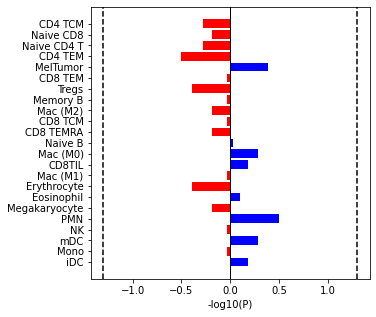

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for cell in order:
    y = p_vals[cell]
    if y <= 0:
        ax.barh(cell, y, color='r')
    else:
        ax.barh(cell, y, color='b')
        
ax.axvline(linewidth=1, color='k')
ax.axvline(x=-np.log10(0.05), linewidth=1.5, color='k', ls='--')
ax.axvline(x=np.log10(0.05), linewidth=1.5, color='k', ls='--')
#ax.annotate('P < 0.05', (0.85, 10), fontsize=12)
ax.set_xlabel('-log10(P)')
plt.savefig(file+'_cutoff_'+str(cutoff)+'_toxicity_barplot_mean.pdf', bbox_inches='tight')